In [2]:
import pandas as pd
import numpy as np

late_shipments = pd.read_feather('datasets/late_shipments.feather')
display(late_shipments.columns)

#contains supply chain data on the delivery of medical supplies
#Each row represents one delivery of a part. 
#The late columns denotes whether or not the part was delivered late.

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [4]:
#######################################################
#Calculating the sample mean
#Calculating a point estimate (or sample statistic), 
#namely the proportion of late shipments.
#######################################################

# Print the late_shipments dataset
display(late_shipments.head())

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments["late"] == "Yes").mean()

# Print the results
print(late_prop_samp)
#The proportion of late shipments in the sample is 6.1%.


,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


0.061


In [49]:
#########################
#Calculating a z-score
#########################
#1 the sample statistic is late_prop_samp
#2 hypothesized parameter is 0.06 (hypothesize that proportion of late schipments is 6%)
#3 the standard error of the statistic (estimated from the bootstrap disttribution)

#Create a bootstrap distribution of the proportion of late shipments, available as a list.
#late_prop_samp = (late_shipments["late"] == "Yes").mean()
#late_shipments_forboot =late_shipments[late_shipments["late"] == 'Yes']

late_shipments_boot_distn = []

for i in range(5000):
    late_shipments_boot_distn.append(
        late_shipments.sample(frac=1,replace=True)['late'].value_counts(normalize=True)[1])

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)    
    
#the z-score is a standardized measure 
#of the difference between the sample statistic and the hypothesized statistic.    

0.1312551873737794


In [51]:
#Calculating p-values
#to determine whether to choose the null hypothesis or the alternative hypothesis, 
#you need to calculate a p-value from the z-score.

#H0 (the null hypothesis) is that the proportion of late shipments is six percent.
#H1 (the alternative hypothesis) is that the proportion of late shipments is greater than six percent.
#Which type of test should be used for this alternative hypothesis?
#alternatine greater that null so we use a right-tailed test (use norm.df())

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

from scipy.stats import norm
# Calculate the p-value
p_value = 1-norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

#The p-value is calculated by transforming the z-score with the standard normal cumulative distribution function.


0.4477867201589082


In [52]:
#Calculating a confidence interval
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn,0.025)
upper = np.quantile(late_shipments_boot_distn,0.975)

# Print the confidence interval
print((lower, upper))

#0.06 is included in the CI 
#and we failed to reject H0 due to a large p-value(0.447) 

#When you have a confidence interval width equal to one minus the significance level, 
#if the hypothesized population parameter is within the confidence interval, 
#you should fail to reject the null hypothesis.


(0.04697500000000001, 0.076)


In [62]:
###################################
#Two sample mean test statistic
###################################
#determine if there is a difference between the means of two populations 
#uses a different type of test statistic to the z-scores, called "t"

#While trying to determine why some shipments are late, 
#you may wonder if the weight of the shipments that were on time is less 
#than the weight of the shipments that were late

xbar = late_shipments.groupby("late")["weight_kilograms"].mean()
xbar_no = xbar[0]
xbar_yes = xbar[1]
print(xbar_no, xbar_yes)

s = late_shipments.groupby("late")["weight_kilograms"].std()
s_no = s[0]
s_yes = s[1]
print(s_no, s_yes)

n = late_shipments.groupby("late")["weight_kilograms"].count()
n_no = n[0]
n_yes = n[1]
print(n_no, n_yes)


# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)



1897.7912673056444 2715.6721311475408
3154.0395070841687 2544.688210903328
939 61
-2.3936661778766433


In [63]:
#we calculated the test statistic for the two-sample problem of 
#whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") 
#compared to shipments that were late (late == "Yes"). 
#to make decisions about it, we need to transform the test statistic 
#with a cumulative distribution function to get a p-value.

#H0: The mean weight of shipments that weren't late is the SAME as the mean weight of shipments that were late.
#H1: The mean weight of shipments that weren't late is LESS than the mean weight of shipments that were late.

from scipy.stats import t

#HA is a less than alternative hypothesis
#we need to use a left-tailed test

#Enter the significance level now
alpha=0.05
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes -2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)
# Print the p_value
print(p_value)

p_value < alpha
#reject H0


0.008432382146249523


shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


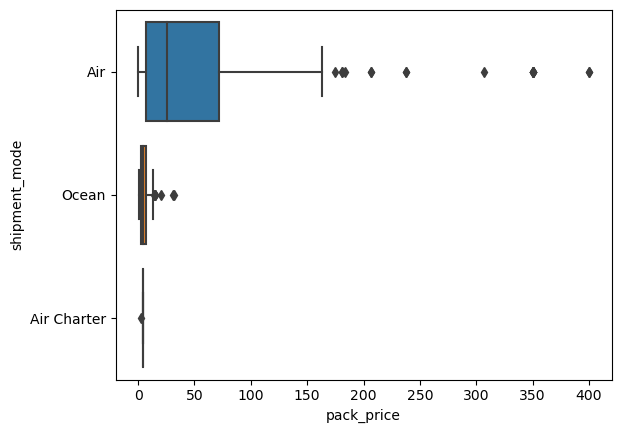

In [68]:
#Visualizing many categories
#how the price of each package (pack_price) varies 
#between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean"
    
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")["pack_price"].mean()
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")["pack_price"].std()
# Print the grouped standard deviations
print(s_pack_by_mode)

import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price",y="shipment_mode", data=late_shipments)
plt.show()

#There certainly looks to be a difference in the pack price between each of the three shipment modes. 
#Do you think the differences are statistically significant?
#Conducting an ANOVA test



In [70]:
##############################
#Conducting an ANOVA test
##############################
#the distribution of pack price was different for each of the three shipment modes. 
#However, the box plots doesn't tell us whether 
#the mean pack price was different in each category. 
#To determine that, we can use an ANOVA test. 

#H0: Pack prices for every category of shipment mode are the same.
#HA: Pack prices for some categories of shipment mode are different.
#Use a significance level of 0.1.

#Run an ANOVA on late_shipments investigating 'pack_price' (the dependent variable) 
#between the groups of 'shipment_mode'.

# Run an ANOVA for pack_price across shipment_mode
#!pip install pingouin
import pingouin
anova_results = pingouin.anova(data=late_shipments, dv="pack_price", between="shipment_mode")

# Print anova_results
print(anova_results)

#Assuming a significance level of 0.1, 
#should you reject the null hypothesis that there is no difference in pack prices between shipment modes?
#p_value is less than the significance level so reject H0 in favor of HA

#There is a significant difference in pack prices between the shipment modes. 
#However, we don't know which shipment modes this applies to.

#Pairwise t-tests


          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [74]:
###################
#Pairwise t-tests
###################
#Perform pairwise t-tests on late_shipments's pack_price variable, 
#grouped by shipment_mode, without doing any p-value adjustment.

# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv="pack_price", between="shipment_mode") 

# Print pairwise_results
display(pairwise_results)
#default no correction


# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
display(pairwise_results)

#Using the Bonferroni correction results and assuming a significance level of 0.1, 
#for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


In [79]:
##############################
#Test for single proportions
##############################
# Hypothesize that the proportion of late shipments is GREATER THAN 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments["late"] == "Yes").mean()
# Calculate the sample size
n = len(late_shipments)
print(p_hat, n)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt((p_0*(1-p_0)/n))
# Calculate the test statistic
z_score = numerator /denominator
# Print the result
print(z_score)

# Calculate the p-value from the z-score
#this is a right-tailed test
p_value = 1-norm.cdf(z_score)
# Print the p-value
print(p_value)



0.061 1000
0.13315591032282698
0.44703503936503364


In [99]:
##############################
#Test of two proportions
##############################
#Is the amount paid for freight 'freight_cost_group' ('expensive' or 'reasonable')
#affects whether or not the shipment was 'late'. 

#H0: late_expensive - late_reasonable = 0
#HA: late_expensive - late_reasonable > 0

p_hats = late_shipments.groupby("freight_cost_groups")["late"].value_counts(normalize=True)
print(p_hats)
p_hats = p_hats[[("expensive", "Yes"),("reasonable","Yes")]]
print(p_hats)

ns = late_shipments.groupby("freight_cost_groups")["late"].count()
print(ns)

# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Print the result
print(p_hat)

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["reasonable"] + p_hat_times_not_p_hat / ns["expensive"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Print z_score
print(z_score)

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score)

# Print p_value
print(p_value)

#You can calculate a p-value for a two sample proportion test using (a rather exhausting amount of) arithmetic. 
#This tiny p-value (0.0017) leads us to suspect 
#there is a larger proportion of late shipments for expensive freight compared to reasonable freight.




freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: late, dtype: float64
freight_cost_groups  late
expensive            Yes     0.079096
reasonable           Yes     0.035165
Name: late, dtype: float64
freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64
late
Yes    0.058824
Name: late, dtype: float64
late
Yes    0.015031
Name: late, dtype: float64
late
Yes    2.922649
Name: late, dtype: float64
[0.00173534]


In [103]:
########################################
#proportions_ztest() for two samples
########################################
#That took a lot of effort to calculate the p-value, 
#so while it is useful to see how the calculations work, 
#it isn't practical to do in real-world analyses. 
#For daily usage, it's better to use the statsmodels package.

# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")["late"].value_counts()
# Print the counts
print(late_by_freight_cost_group)

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([489+42, 439+16])

from statsmodels.stats.proportion import proportions_ztest
# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,alternative="larger")

# Print the results
print(stat, p_value)

#statsmodels's .proportions_ztest() method gives the same results with less effort.

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64
2.922648567784529 0.001735340002359578


vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: freight_cost_groups, dtype: float64
freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


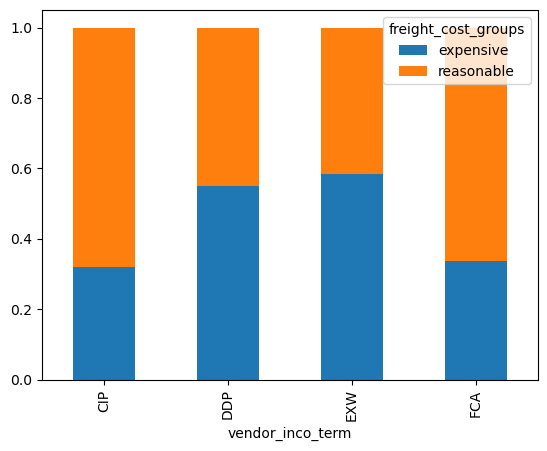

In [111]:
##############################
#Performing a chi-square test
##############################
#vendor_inco_term describes the incoterms that applied to a given shipment (4 categories)
#Perhaps the incoterms affect whether or not the freight costs are expensive. 
#Test these hypotheses with a significance level of 0.01.

#H0: vendor_inco_term and freight_cost_group are independent.
#HA: vendor_inco_term and freight_cost_group are associated.
alpha=0.01

# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments[late_shipments['vendor_inco_term']!='DDU'].groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)
# Print props
print(props)

# Convert props to wide format
wide_props = props.unstack()
# Print wide_props
print(wide_props)

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

#there's some variation here,
#meaning that maybe these variables are associated (not independent)
#let's run a chi_square test to determine whether it's a significent difference


In [114]:
###############################################
#perform a chi-square test of independence
###############################################
import pingouin
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, 
                                                       x="freight_cost_groups", 
                                                       y="vendor_inco_term")

# Print results
print(stats[stats['test'] == 'pearson']) 

#pval<alpha => reject H0
#what we've seen is true => vendor_inco_term and freight_cost_group are associated.


      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


/Users/sarah/anaconda3/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Users/sarah/anaconda3/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Users/sarah/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7421: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/sarah/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7421: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/sarah/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7418: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


  vendor_inco_term  prop
0              CIP  0.05
1              DDP  0.10
2              EXW  0.75
3              FCA  0.10
EXW    732
FCA    111
DDP    100
CIP     56
Name: vendor_inco_term, dtype: int64
  vendor_inco_term    n
3              CIP   56
2              DDP  100
0              EXW  732
1              FCA  111
999
  vendor_inco_term  prop       n
0              CIP  0.05   49.95
1              DDP  0.10   99.90
2              EXW  0.75  749.25
3              FCA  0.10   99.90


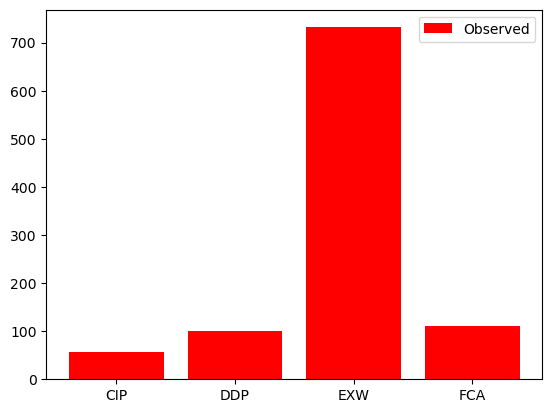

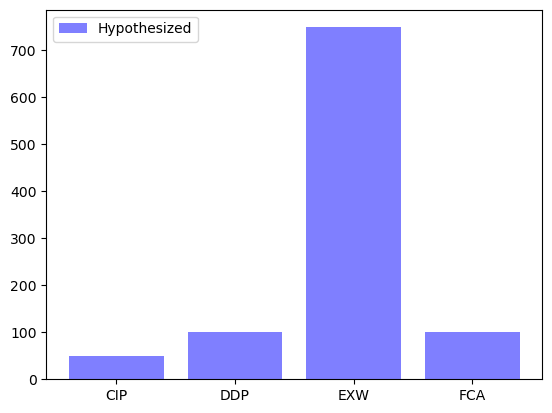

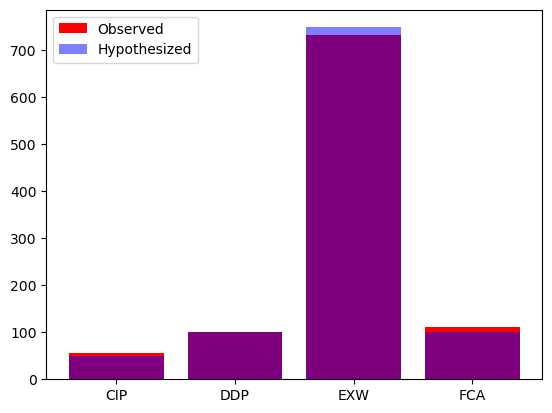

In [130]:
##############################
#Visualizing goodness of fit
#one sample chi-square
##############################
#compares proportions of each level of a categorical variable to hypothesized value
#visually compare the distribution in the sample to the hypothesized distribution.

#We hypothesize that the four values occur with these frequencies in the population of shipments.
hypothesized = pd.DataFrame({'vendor_inco_term': ['CIP', 'DDP', 'EXW', 'FCA'],
                            'prop' : [0.05, 0.1, 0.75, 0.1]})
print(hypothesized)

late_shipments = late_shipments[late_shipments['vendor_inco_term']!='DDU']
incoterm_counts = late_shipments['vendor_inco_term'].value_counts()
print(incoterm_counts)
incoterm_counts = incoterm_counts.rename_axis('vendor_inco_term').reset_index(name='n').sort_values('vendor_inco_term')
print(incoterm_counts)

# Find the number of rows in late_shipments
n_total = len(late_shipments)
# Print n_total
print(n_total)

# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized["prop"] * n_total
# Print the modified hypothesized DataFrame
print(hypothesized)

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts["vendor_inco_term"], incoterm_counts['n'], color= 'red', label="Observed")
plt.legend()
plt.show()


# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue",  label="Hypothesized")
plt.legend()
plt.show()

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts["vendor_inco_term"], incoterm_counts['n'], color= 'red', label="Observed")
# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue",  label="Hypothesized")
plt.legend()
plt.show()

# Two of the bars in the sample are very close to the hypothesized values: 
#one is a little high and one is a little low.
#le's run a test if these differences are statistically significant.



In [131]:
#####################################
#Performing a goodness of fit test
#####################################
#The test to compare the proportions of a categorical variable to a hypothesized distribution 
#is called a chi-square goodness of fit test.


#The bar plot of vendor_inco_term suggests that the distribution across the four categories 
#was quite close to the hypothesized distribution. Y
#we'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

#H0: The sample matches with the hypothesized distribution.
#HA: The sample does not match with the hypothesized distribution.
#To decide which hypothesis to choose, we'll set a significance level of 0.1
alpha=0.1

from scipy.stats import chisquare
chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])

#pvalue=0.50 > alpha => Fail to reject H0
#and conclude that the sample matches with the hypothesized distribution.



Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)

In [140]:
###########################
#Testing sample size
###########################
#In order to conduct a hypothesis test and be sure that the result is fair, 
#a sample must meet three requirements: 
#it is a random sample of the population, 
#the observations are independent, 
#and there are enough observations. 
#Of these, only the last condition is easily testable with code.

#The minimum sample size depends on the type of hypothesis tests you want to perfor
# Count the freight_cost_group values
counts = late_shipments["freight_cost_groups"].value_counts()

# Print the result
print(counts)
# Inspect whether the counts are big enough for a two sample t-test
print((counts >= 30).all())

# Count the late values
counts = late_shipments["late"].value_counts()
# Print the result
print(counts)
# Inspect whether the counts are big enough for one sample proportion test
print((counts >= 10).all())

# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()
# Print the result
print(counts)
# Inspect whether the counts are big enough for a chi-square independence test
print((counts >= 5).all())

# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()
# Print the result
print(counts)
# Inspect whether the counts are big enough for an anova test
print((counts >= 30).all())

#we can test that your sample sizes are big enough to make a hypothesis test appropriate. 
#we should be a little cautious of the ANOVA test results given the small sample size for Air Charter.



expensive     531
reasonable    454
Name: freight_cost_groups, dtype: int64
True
No     938
Yes     61
Name: late, dtype: int64
True
vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
True
Air            905
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


In [141]:
#################################################################
#Wilcoxon-Mann-Whitney
#One common rank-based test like a non-parametric t-test
#################################################################

#By calculating on the ranks of data instead of the actual values, 
#we can avoid making assumptions about the distribution of the test statistic. 


# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[["weight_kilograms","late"]]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')
display(weight_vs_late_wide)

#Run a Wilcoxon-Mann-Whitney test for a difference in weight_kilograms when the shipment was late and on-time.
# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
                        y=weight_vs_late_wide['Yes'],
                        alternative='two-sided')

# Print the test results
print(wmw_test)


#The small p-value here (rejectH0) leads us to suspect that a difference does exist 
#in the weight of the shipment and whether or not it was late. 
#The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test 
#comparing two means, like the t-test.



late,No,Yes
0,NaN,1426.0
1,10.0,NaN
2,3723.0,NaN
3,7698.0,NaN
4,56.0,NaN
...,...,...
995,43.0,NaN
996,99.0,NaN
997,NaN,881.0
998,16234.0,NaN


       U-val alternative     p-val       RBC      CLES
MWU  19131.0   two-sided  0.000014  0.331294  0.334353


In [142]:
#########################################################
#Kruskal-Wallis
#it's a non-parametric version of an ANOVA test, 
#comparing the means across multiple groups.
#########################################################

# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal( data=late_shipments,
                            dv='weight_kilograms',
                            between='shipment_mode')

# Print the results
print(kw_test)

#The Kruskal-Wallis test yielded a very small p-value, 
#so there is evidence that at least one of the three groups of shipment mode 
#has a different weight distribution than the others. 
#The Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.



                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  124.983244  7.248254e-28
